# Simple linear regression 

####  Linear regression class is implemented with Normal equation and Gradient descent methods and feature scaling is also developed
####  Dataset is downloaded from super data science website. Independent column is Years of experience and Dependent column is Salary

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
class LinearRegression:
    def __init__(self,X,Y): 
        ones=np.ones(X.shape)
        X=np.append(ones,X,axis=1)
        self.X=X
        self.Y=Y
        self.m=X.shape[0]
        self.n=X.shape[1]
        self.theta=np.random.randn(X.shape[1])
        
    def computeCostFunction(self):
        h=np.matmul(self.X,self.theta)
        self.J=(1/(2*self.m))*np.sum((h-self.Y)**2)
        return self.J
    
    def performGradientDescent(self,num_of_iter,alpha):
        self.Cost_history=[]
        self.theta_history=[]
        for x in range(num_of_iter):
            h=np.matmul(self.X,self.theta)
            J=self.computeCostFunction()
            self.Cost_history.append(J)
            self.theta_history.append(self.theta)
            temp=h-self.Y
            self.theta=self.theta-(alpha/self.m)*(self.X.T.dot(temp))
        return self.theta,self.Cost_history,self.theta_history
            
        
    def predict(self,X_test,Y_test):
        ones=np.ones(X_test.shape)
        X_test=np.append(ones,X_test,axis=1)
        self.Y_pred=np.matmul(X_test,self.theta)
        self.error_percentage=(abs(self.Y_pred-Y_test)/Y_test)*100
        return self.Y_pred,self.error_percentage
    
    def predictUsingNormalEquation(self,X_test,Y_test):
        ones=np.ones(X_test.shape)
        X_test=np.append(ones,X_test,axis=1)
        inv=np.linalg.inv(np.matmul(self.X.T,self.X))
        self.w=np.matmul(np.matmul(inv,self.X.T),self.Y)
        y_pred=np.matmul(X_test,self.w)
        return y_pred,(abs(Y_test-y_pred)/Y_test)*100
        
        
    
        
    def returnTheta(self):
        return self.theta
    
    def returnX(self):
        return self.X
        
    def returnY(self):
        return self.Y


In [3]:
class FeatureScaling:
    def __init__(self,X,y):
        self.X=X.copy()
        if y.ndim==1:
            y=np.reshape(y,(y.shape[0],1))
        self.y=y.copy()
        self.minMax_X={}
        self.minMax_y={}
    
    def fit_transform_X(self):
        num_of_features=self.X.shape[1]
        for i in range(num_of_features):
            feature=self.X[:,i]
            Mean=np.mean(feature)
            Min=np.min(feature)
            Max=np.max(feature)
            feature=(feature-Mean)/(Max-Min)
            self.minMax_X[i]=np.array([Mean,Min,Max])
            self.X[:,i]=feature
        return self.X.copy()
    
    def fit_transform_Y(self):
        num_of_features=self.y.shape[1]
        for i in range(num_of_features):
            feature=self.y[:,i]
            Mean=np.mean(feature)
            Min=np.min(feature)
            Max=np.max(feature)
            feature=(feature-Mean)/(Max-Min)
            self.minMax_y[i]=np.array([Mean,Min,Max])
            self.y[:,i]=feature
        return np.reshape(self.y,self.y.shape[0])
    
    def inverse_transform_X(self,X):
        X_transformed=X.copy()
        num_of_features=X_transformed.shape[1]
        for i in range(num_of_features):
            feature=X_transformed[:,i]
            Mean=self.minMax_X[i][0]
            Min=self.minMax_X[i][1]
            Max=self.minMax_X[i][2]
            feature=feature*(Max-Min)+Mean
            X_transformed[:,i]=feature
        return X_transformed
    
    def inverse_transform_Y(self,y):
        y_transformed=y.copy()
        if y_transformed.ndim==1:
            y_transformed=np.reshape(y_transformed,(y_transformed.shape[0],1))
        num_of_features=y_transformed.shape[1]
        for i in range(num_of_features):
            feature=y_transformed[:,i]
            Mean=self.minMax_y[i][0]
            Min=self.minMax_y[i][1]
            Max=self.minMax_y[i][2]
            feature=feature*(Max-Min)+Mean
            y_transformed[:,i]=feature
        return np.reshape(y_transformed,y_transformed.shape[0])
    
    def transform_X(self,X):
        X_transformed=X.copy()
        num_of_features=X_transformed.shape[1]
        for i in range(num_of_features):
            feature=X_transformed[:,i]
            Mean=self.minMax_X[i][0]
            Min=self.minMax_y[i][1]
            Max=self.minMax_y[i][2]
            feature=(feature-Mean)/(Max-Min)
            X_transformed[:,i]=feature
        return X_transformed
    
    def transform_Y(self,y):
        y_transformed=y.copy()
        if y_transformed.ndim==1:
            y_transformed=np.reshape(y_transformed,(y_transformed.shape[0],1))
        num_of_features=y_transformed.shape[1]
        for i in range(num_of_features):
            feature=y_transformed[:,i]
            Mean=self.minMax_y[i][0]
            Min=self.minMax_y[i][1]
            Max=self.minMax_y[i][2]
            feature=(feature-Mean)/(Max-Min)
            y_transformed[:,i]=feature
        return np.reshape(y_transformed,y_transformed.shape[0])
    
    def returnX(self):
        return self.X
    
    def returnY(self):
        return self.y
        
        

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from LinearRegression import LinearRegression

In [5]:
Data=pd.read_csv('Salary_Data.csv')
print(Data)

    YearsExperience    Salary
0               1.1   39343.0
1               1.3   46205.0
2               1.5   37731.0
3               2.0   43525.0
4               2.2   39891.0
5               2.9   56642.0
6               3.0   60150.0
7               3.2   54445.0
8               3.2   64445.0
9               3.7   57189.0
10              3.9   63218.0
11              4.0   55794.0
12              4.0   56957.0
13              4.1   57081.0
14              4.5   61111.0
15              4.9   67938.0
16              5.1   66029.0
17              5.3   83088.0
18              5.9   81363.0
19              6.0   93940.0
20              6.8   91738.0
21              7.1   98273.0
22              7.9  101302.0
23              8.2  113812.0
24              8.7  109431.0
25              9.0  105582.0
26              9.5  116969.0
27              9.6  112635.0
28             10.3  122391.0
29             10.5  121872.0


In [6]:
Data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


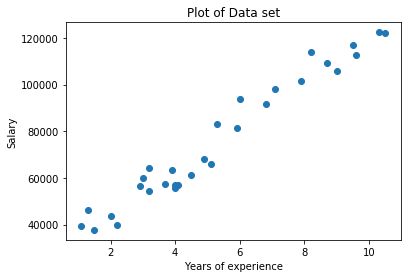

In [7]:
#plot of dataset
plt.scatter(Data.iloc[:,0:1].values,Data.iloc[:,1].values)
plt.xlabel('Years of experience')
plt.ylabel('Salary')
plt.title('Plot of Data set')
plt.show()

In [8]:
#training and testing size
train_size=int(0.7*Data.shape[0])
test_size=int(0.3*Data.shape[0])
print("Training set size : "+ str(train_size))
print("Testing set size : "+str(test_size))

Training set size : 21
Testing set size : 9


In [9]:
#shuffle the dataset
Data=Data.sample(frac=1)
X=Data.iloc[:,0:1].values
y=Data.iloc[:,1].values

In [10]:
from FeatureScaling import FeatureScaling
fs=FeatureScaling(X,y)
X=fs.fit_transform_X()
y=fs.fit_transform_Y()

In [11]:
#training set split
X_train=X[0:train_size,:]
Y_train=y[0:train_size]

In [12]:
print(X_train.shape)
print(Y_train.shape)

(21, 1)
(21,)


In [13]:
#testing set split
X_test=X[train_size:,:]
Y_test=y[train_size:]

In [14]:
print(X_test.shape)
print(Y_test.shape)

(9, 1)
(9,)


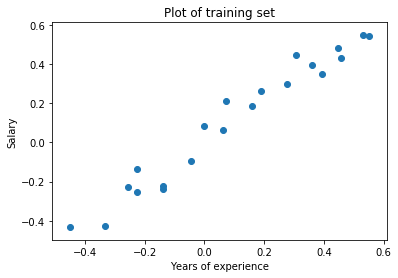

In [15]:
#scatter plot of training set
plt.scatter(X_train,Y_train)
plt.xlabel('Years of experience')
plt.ylabel('Salary')
plt.title('Plot of training set')
plt.show()

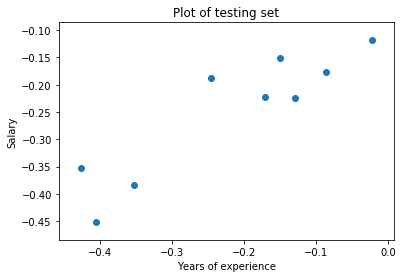

In [16]:
#scatter plot of testing set
plt.scatter(X_test,Y_test)
plt.xlabel('Years of experience')
plt.ylabel('Salary')
plt.title('Plot of testing set')
plt.show()

In [17]:
lr=LinearRegression(X_train,Y_train)

In [18]:
theta=lr.returnTheta()
print(theta)

[ 0.52625538 -0.80083325]


In [19]:
#testing set prediction
y_pred_normal,error_percentage=lr.predictUsingNormalEquation(X_test,Y_test)
y_pred_normal=fs.inverse_transform_Y(y_pred_normal)
print(error_percentage)

[-22.7894123  -24.82722046 -33.3398793   -7.74749019 -86.94147
  -5.83150423 -43.19770228  -1.15553092 -53.19727654]


In [20]:
#training set prediction
y_pred_train_normal,error_percentage_train_normal=lr.predictUsingNormalEquation(X_train,Y_train)
y_pred_train_normal=fs.inverse_transform_Y(y_pred_train_normal)
print(lr.computeCostFunction())

0.2111011693603257


In [21]:
#learning parameters
n_iter=1000
alpha=0.05

theta,J_Array,theta_array=lr.performGradientDescent(n_iter,alpha)

In [22]:
y_pred_grad,ErrorPercentage=lr.predict(X_test,Y_test)
print(ErrorPercentage)
y_pred_grad=fs.inverse_transform_Y(y_pred_grad)

[-25.76723669 -21.20467676 -28.85063095 -10.45489795 -89.52200501
  -8.68886278 -45.70121635  -5.19918681 -55.79720929]


In [23]:
#let's see how train set is predicted
y_pred_train,error_for_train=lr.predict(X_train,Y_train)
y_pred_train=fs.inverse_transform_Y(y_pred_train)
print(error_for_train)

[ 21.80688809  -3.55274879 -10.27129067   3.42229284  27.09174878
   6.92847896  18.15596607  18.25368054   1.98395779 -13.81008256
  59.51758188 -60.76157121   3.73174878  88.69734786   1.2061223
 -41.20891576   6.37546956 -44.59226135 -64.15445326 -22.98913651
  10.52347012]


In [24]:
#inverse scaling the features
X_train=fs.inverse_transform_X(X_train)
Y_train=fs.inverse_transform_Y(Y_train)
X_test=fs.inverse_transform_X(X_test)
Y_test=fs.inverse_transform_Y(Y_test)

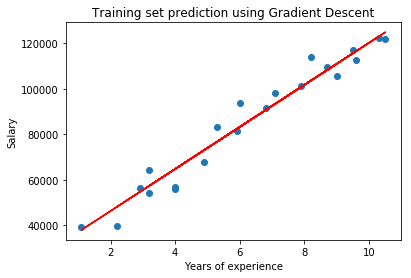

In [25]:
#let's see how train set is predicted using gradient descent
plt.scatter(X_train,Y_train)
plt.plot(X_train,y_pred_train,'r')
plt.xlabel('Years of experience')
plt.ylabel('Salary')
plt.title('Training set prediction using Gradient Descent')
plt.show()

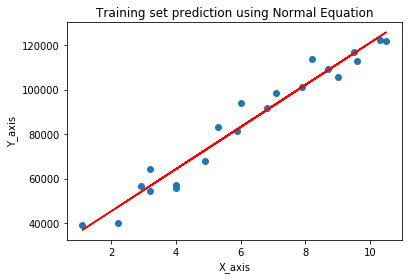

In [26]:
#let's see how train set is predicted using normal equation
plt.scatter(X_train,Y_train)
plt.plot(X_train,y_pred_train_normal,'r')
plt.xlabel('X_axis')
plt.ylabel('Y_axis')
plt.title('Training set prediction using Normal Equation')
plt.show()

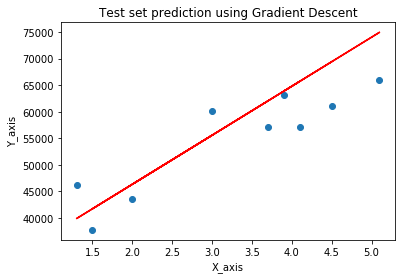

In [27]:
#let's see how test set is predicted using gradient descent
plt.scatter(X_test,Y_test)
plt.plot(X_test,y_pred_grad,'r')
plt.xlabel('X_axis')
plt.ylabel('Y_axis')
plt.title('Test set prediction using Gradient Descent')
plt.show()

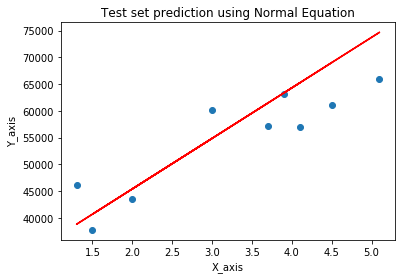

In [28]:
#let's see how test set is predicted using normal equation method
plt.scatter(X_test,Y_test)
plt.plot(X_test,y_pred_normal,'r')
plt.xlabel('X_axis')
plt.ylabel('Y_axis')
plt.title('Test set prediction using Normal Equation')
plt.show()

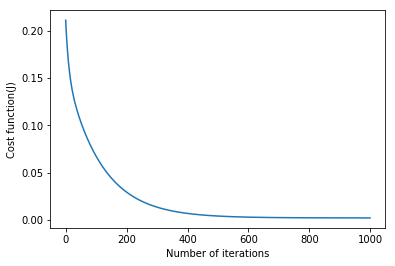

In [29]:
#plot of how cost function is minimized as number of iterations is proceeded
x=[i for i in range(1000)]
plt.plot(x,J_Array)
plt.xlabel('Number of iterations')
plt.ylabel('Cost function(J)')
plt.show()